In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itsmee33","key":"8dcfaf8512e4182ba8285b23ee4fe935"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Jan 14 03:51 kaggle.json


In [ ]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           1774         72  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1002         38  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5235        171  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset

100% 586M/587M [00:17<00:00, 40.4MB/s]
100% 587M/587M [00:17<00:00, 35.2MB/s]


In [ ]:
!unzip weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow

In [ ]:
import pathlib
data_dir = pathlib.Path("/content/dataset")
print(data_dir)

/content/dataset


/content/dataset/rain/1372.jpg


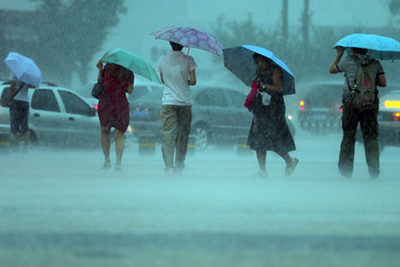

In [ ]:
rain = list(data_dir.glob('rain/*'))
print(rain[0])
PIL.Image.open(str(rain[0]))

In [ ]:
img_height,img_width=180,180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6862 files belonging to 11 classes.
Using 5490 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6862 files belonging to 11 classes.
Using 1372 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


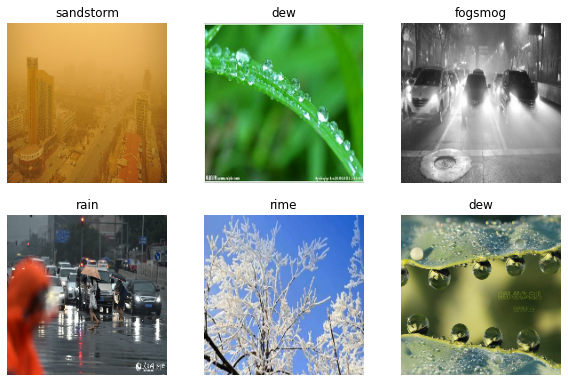

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Training Model

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=11,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(11, activation='softmax'))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 11)               5643      
 pper)                                                           
                                                                 
Total params: 24,642,443
Trainable params: 1,054,731
Non-trainable params: 23,587,712
____________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
172/172 [==============================] - 34s 134ms/step - loss: 0.6738 - accuracy: 0.7869 - val_loss: 0.5877 - val_accuracy: 0.7966
Epoch 2/10
172/172 [==============================] - 22s 125ms/step - loss: 0.3100 - accuracy: 0.8922 - val_loss: 0.4526 - val_accuracy: 0.8564
Epoch 3/10
172/172 [==============================] - 23s 130ms/step - loss: 0.1980 - accuracy: 0.9321 - val_loss: 0.4764 - val_accuracy: 0.8448
Epoch 4/10
172/172 [==============================] - 22s 124ms/step - loss: 0.1370 - accuracy: 0.9536 - val_loss: 0.4920 - val_accuracy: 0.8586
Epoch 5/10
172/172 [==============================] - 25s 142ms/step - loss: 0.0893 - accuracy: 0.9690 - val_loss: 0.5092 - val_accuracy: 0.8622
Epoch 6/10
172/172 [==============================] - 22s 123ms/step - loss: 0.0701 - accuracy: 0.9772 - val_loss: 0.5681 - val_accuracy: 0.8571
Epoch 7/10
172/172 [==============================] - 21s 122ms/step - loss: 0.0566 - accuracy: 0.9840 - val_loss: 0.6282 - val_ac

## Evaluasi Model

In [ ]:
print("Akurasi modelnya setelah dilakukan transfer learning adalah: ")
print(history.history['accuracy'])
print(history.history['val_accuracy'])

print("\n")

print("Loss modelnya setelah dilakukan transfer learning adalah: ")
print(history.history['loss'])
print(history.history['val_loss'])

Akurasi modelnya setelah dilakukan transfer learning adalah: 
[0.7868852615356445, 0.8921675682067871, 0.9320582747459412, 0.9535518884658813, 0.9690346121788025, 0.9772313237190247, 0.9839708805084229, 0.9839708805084229, 0.9881603121757507, 0.9908925294876099]
[0.7966472506523132, 0.8564140200614929, 0.8447521924972534, 0.8586005568504333, 0.8622449040412903, 0.8571428656578064, 0.8505830764770508, 0.8454810380935669, 0.8593294620513916, 0.8688046932220459]


Loss modelnya setelah dilakukan transfer learning adalah: 
[0.6737794280052185, 0.31004783511161804, 0.19796523451805115, 0.13696415722370148, 0.08926421403884888, 0.07006721198558807, 0.05664185807108879, 0.05335894972085953, 0.04178003594279289, 0.035611607134342194]
[0.5877195596694946, 0.4525681138038635, 0.47643032670021057, 0.4920353591442108, 0.5091734528541565, 0.5681041479110718, 0.6281989812850952, 0.6051158905029297, 0.6564494371414185, 0.6080425381660461]


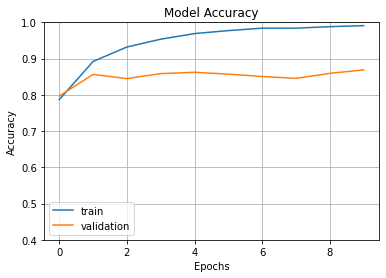

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

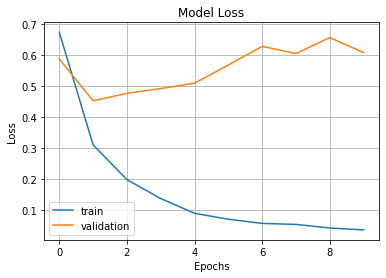

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Test Prediksi

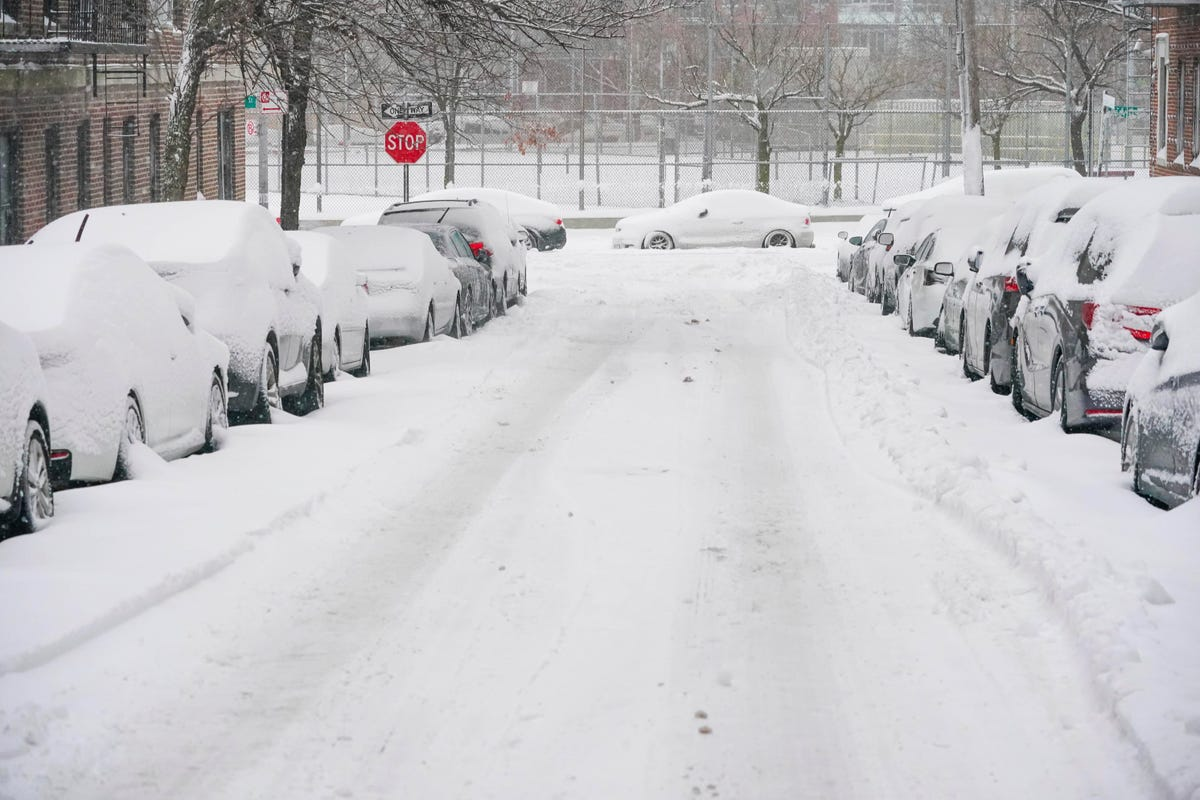

1/1 [==============================] - 0s 32ms/step
Prediksi gambar cuacanya adalah: snow


In [ ]:
import cv2
import urllib


def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

url = "https://imageio.forbes.com/specials-images/imageserve/5fed2de951ff8d421183b6e6/0x0.jpg?format=jpg&width=1200"
# imagePred = cv2.imread(str(rain[0]))
imagePred = url_to_image(url)
cv2_imshow(imagePred)

image_resized = cv2.resize(imagePred, (img_height,img_width))
imagePred = np.expand_dims(image_resized,axis=0)

pred=resnet_model.predict(imagePred)
output_class=class_names[np.argmax(pred)]
print("Prediksi gambar cuacanya adalah:", output_class)